In [1]:
!pip install geopandas

In [2]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
# Load the combined dataset
df = dd.read_csv("combined_file.csv", parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"])

In [4]:
# Convert Dask DataFrame to Pandas for analysis
df_sample = df.sample(frac=0.1).compute()  # 10% sample to avoid memory overload

C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, 

### Task 1 : ETL 

In [5]:
# Import necessary libraries

import dask.dataframe as dd
import pandas as pd
import numpy as np

In [6]:
# Step 1: Extract - Load Data
def extract_data(file_path):
    print("Extracting data...")
    df = dd.read_csv(file_path, parse_dates=True, infer_datetime_format=True)
    return df

In [7]:
# Step 2: Transform - Data Cleaning & Feature Engineering
def transform_data(df):
    print("Transforming data...")
    
# Convert Dask DF to Pandas (use sample if too large)
df_sample = df.sample(frac=0.1).compute()

C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, 

In [8]:
# Convert datetime columns
datetime_cols = ["tpep_pickup_datetime", "tpep_dropoff_datetime"]
for col in datetime_cols:
    df_sample[col] = pd.to_datetime(df_sample[col], errors="coerce")

In [9]:
 # Feature Engineering
df_sample["trip_duration"] = (df_sample["tpep_dropoff_datetime"] - df_sample["tpep_pickup_datetime"]).dt.total_seconds() / 60
df_sample["hour_of_day"] = df_sample["tpep_pickup_datetime"].dt.hour
df_sample["day_of_week"] = df_sample["tpep_pickup_datetime"].dt.day_name()

In [10]:
# Outlier Handling using IQR
Q1 = df_sample["trip_duration"].quantile(0.25)
Q3 = df_sample["trip_duration"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_sample = df_sample[
    (df_sample["trip_duration"] > lower_bound) & 
    (df_sample["trip_duration"] < upper_bound) & 
    (df_sample["trip_distance"] > 0)
]

In [11]:
# Step 3: Load - Save Cleaned Data
def load_data(df, output_path):
    print("Loading data...")
    df.to_csv(output_path, index=False)
    print(f"Data saved to {output_path}")

In [12]:
# Run the ETL Pipeline
def transform_data(df):
    print("Transforming data...")
    
    # Outlier Handling
    df_sample = df[(df["trip_duration"] > 1) & (df["trip_distance"] > 0)]
    
    print("Transformation complete.")
    return df_sample  # Ensure the cleaned DataFrame is returned

### Task 2

In [13]:
# Extract time-based features
df_sample["pickup_hour"] = df_sample["tpep_pickup_datetime"].dt.hour
df_sample["pickup_day"] = df_sample["tpep_pickup_datetime"].dt.day_name()
df_sample["pickup_month"] = df_sample["tpep_pickup_datetime"].dt.month

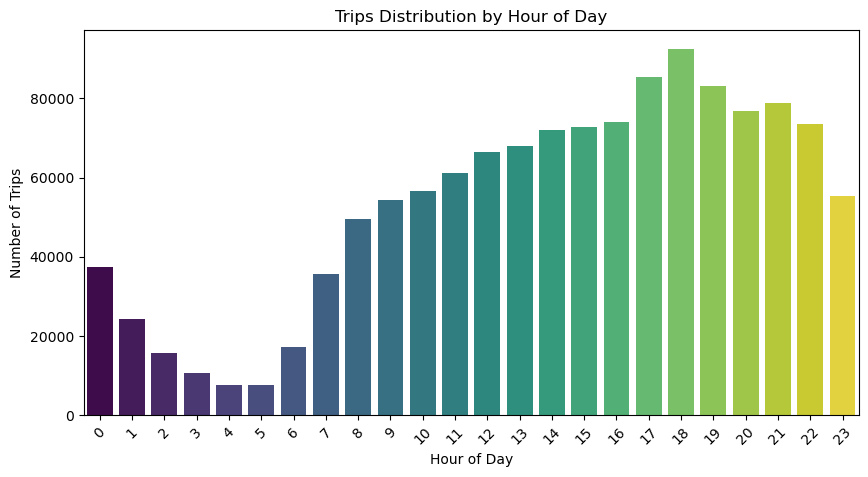

In [14]:
# Trip Distribution Over Time
plt.figure(figsize=(10, 5))
sns.countplot(data=df_sample, x="pickup_hour", hue="pickup_hour", legend=False, palette="viridis")
plt.title("Trips Distribution by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()

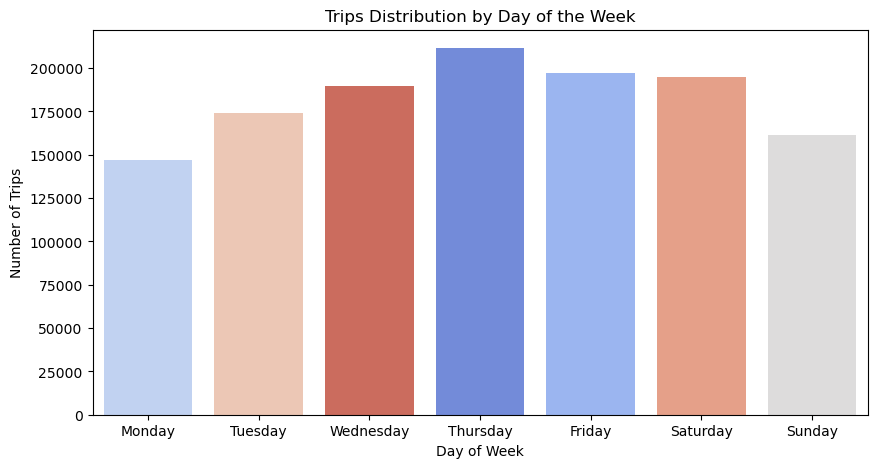

In [15]:
# Seasonal Variations - Trips per day of the week
plt.figure(figsize=(10, 5))
sns.countplot(data=df_sample, x="pickup_day", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], hue="pickup_day", legend=False, palette="coolwarm")
plt.title("Trips Distribution by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.show()

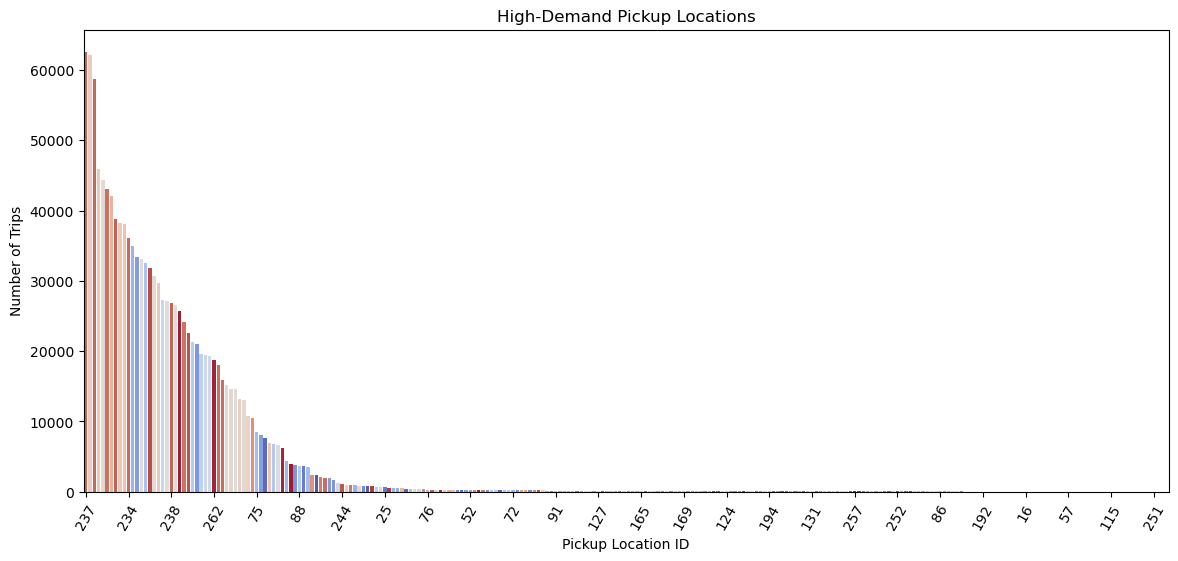

In [16]:
# High-Demand Locations Analysis 

plt.figure(figsize=(14, 6))  # Increase figure size for clarity

sns.countplot(
    x=df_sample["PULocationID"], 
    order=df_sample["PULocationID"].value_counts().index, 
    hue=df_sample["PULocationID"],  # Assign hue
    legend=False,  # Remove redundant legend
    palette="coolwarm"
)

plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Trips")
plt.title("High-Demand Pickup Locations")

# Reduce the number of x-axis labels for better visualization
plt.xticks(ticks=plt.xticks()[0][::10])  # Show every 10th label to avoid clutter

plt.show()

# Task 3 

In [17]:
# Compute total revenue
total_revenue = df_sample["total_amount"].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

Total Revenue: $30697583.53


In [18]:
# Average fare per trip
average_fare = df_sample["fare_amount"].mean()
print(f"Average Fare per Trip: ${average_fare:.2f}")

Average Fare per Trip: $16.12


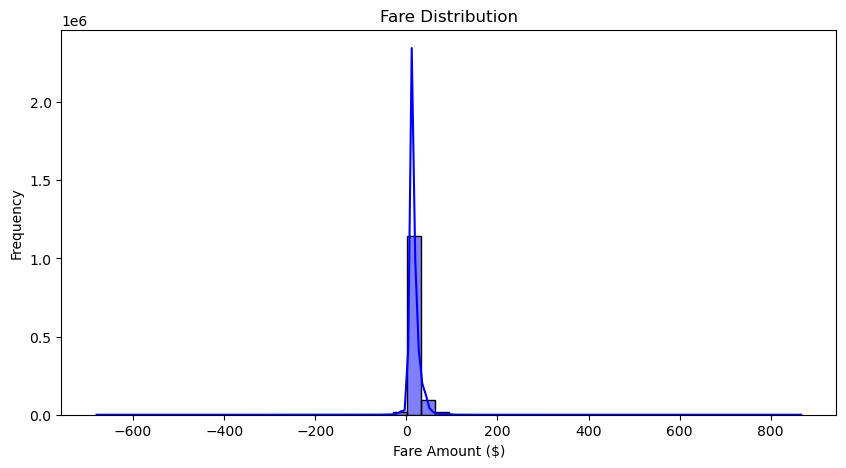

In [19]:
# Fare Distribution Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df_sample["fare_amount"], bins=50, kde=True, color="blue")
plt.title("Fare Distribution")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.show()

C:\Users\sandh\AppData\Local\Temp\ipykernel_15856\1374573846.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_borough.index, y=revenue_by_borough.values, palette="magma")


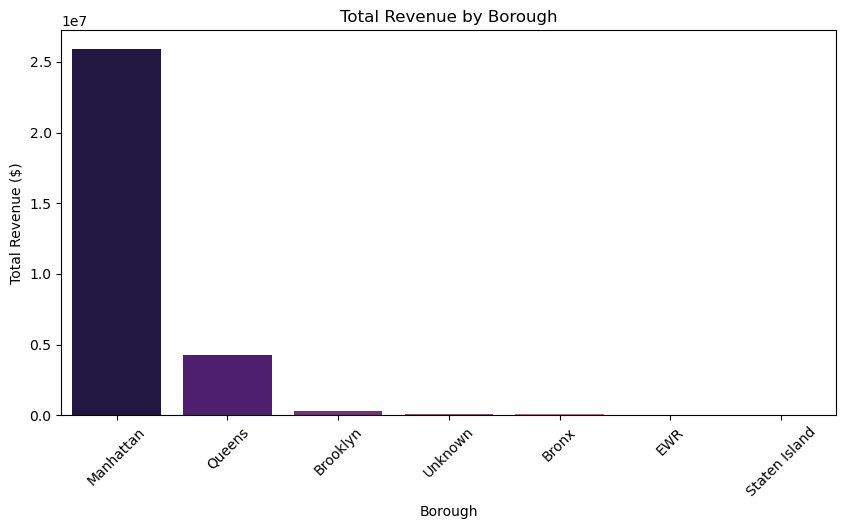

In [21]:
# Revenue by Borough (Requires NYC Taxi Zone Map)
# Assuming 'PULocationID' maps to boroughs via a lookup table
taxi_zones = pd.read_csv("taxi_zone_lookup.csv")  # NYC Taxi Zone lookup table
df_sample = df_sample.merge(taxi_zones, left_on="PULocationID", right_on="LocationID", how="left")

revenue_by_borough = df_sample.groupby("Borough")["total_amount"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=revenue_by_borough.index, y=revenue_by_borough.values, palette="magma")
plt.title("Total Revenue by Borough")
plt.xlabel("Borough")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()

In [22]:
print(taxi_zones.columns)
print(df_sample.head())  # Check if Borough column is there

Index(['LocationID', 'Borough', 'Zone', 'service_zone'], dtype='object')
   Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0       86411         2  2024-02-01 20:23:03   2024-02-01 20:35:22   
1      203544         2  2024-02-02 23:46:36   2024-02-03 00:02:30   
2      403573         1  2024-02-05 08:05:42   2024-02-05 08:38:25   
3      381604         2  2024-02-04 19:51:18   2024-02-04 20:26:50   
4      322793         2  2024-02-04 02:51:02   2024-02-04 03:13:53   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           2.76         1.0                  N   
1              2.0           3.11         1.0                  N   
2              2.0           3.90         1.0                  N   
3              2.0           9.31         1.0                  N   
4              1.0           9.03         1.0                  N   

   PULocationID  DOLocationID  ...  trip_duration  hour_of_day  day_of_week  \
0            79   

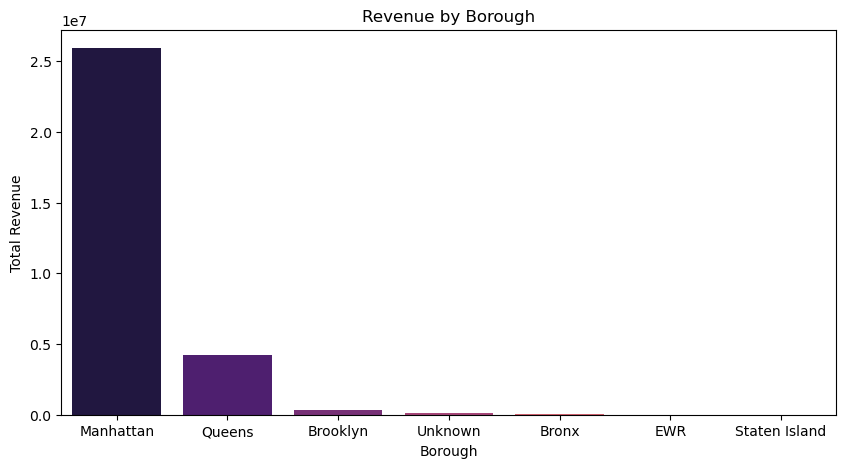

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=revenue_by_borough.index, 
    y=revenue_by_borough.values, 
    hue=revenue_by_borough.index,  # Assign hue
    legend=False,  # Remove redundant legend
    palette="magma"
)
plt.xlabel("Borough")
plt.ylabel("Total Revenue")
plt.title("Revenue by Borough")
plt.show()